In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-genes/GPL570_limpo.txt
/kaggle/input/brain-cancer-gene-expression-cumida/Brain_GSE50161.csv


**Preprocessing**

In [7]:
data = pd.read_csv('../input/brain-cancer-gene-expression-cumida/Brain_GSE50161.csv')

In [8]:
data.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [9]:
index_names = data[ data['type']== "ependymoma"].index

data.drop(index_names, inplace = True)


index_2 = data[ data['type']== "glioblastoma"].index

data.drop(index_2, inplace = True)

index_3=data[ data['type']== "pilocytic_astrocytoma"].index

data.drop(index_3, inplace = True)

data.fillna(0) 



,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
80,914,medulloblastoma,10.156207,9.693809,7.574539,8.098709,5.732022,7.220216,6.668800,6.248897,...,13.351799,12.974302,14.239070,13.994875,5.508962,4.801631,3.981289,4.263757,5.420217,5.314012
81,915,medulloblastoma,11.228749,9.210523,7.079879,9.799283,6.309972,6.872167,6.523689,7.380611,...,13.109080,12.598169,13.894320,13.719858,5.042306,4.769591,3.934382,3.694621,4.464970,4.572689
82,916,medulloblastoma,10.801229,9.321449,7.145501,9.881427,4.656693,7.403754,6.640770,7.026398,...,12.050838,11.492464,13.463735,13.259151,5.556973,4.893124,3.864562,3.610794,4.590739,4.709032
83,917,medulloblastoma,11.035117,8.533094,7.362592,9.903646,4.155546,7.658873,6.694683,6.341366,...,12.439191,11.826036,13.616802,13.532037,5.413510,4.985404,4.025622,3.774762,4.548004,4.575803
84,918,medulloblastoma,11.561517,8.477246,7.284677,10.082448,4.280372,7.057130,6.895458,7.534697,...,12.448830,11.765700,13.688801,13.357011,5.449033,4.840538,4.132473,3.575780,4.539746,4.708261
85,919,medulloblastoma,11.335461,9.211290,6.222515,8.289107,4.505269,7.511797,7.830174,5.641765,...,13.366401,12.980167,14.241468,14.118189,5.167036,4.611306,3.690199,3.803287,4.651539,4.519167
86,920,medulloblastoma,11.401194,8.523019,7.103413,9.930036,5.778261,7.941297,6.692168,7.758998,...,12.510433,11.940182,13.646216,13.597221,5.216630,4.678024,3.815507,3.610161,4.557687,4.714354
87,921,medulloblastoma,11.425860,8.784928,7.586814,9.845309,4.540908,7.171612,6.713306,7.345281,...,12.128212,11.557273,13.520401,13.199780,5.451690,4.832875,4.125730,3.587381,4.610700,4.781534
88,922,medulloblastoma,11.269098,8.427713,6.685038,9.330549,4.277179,6.993317,7.536233,7.411815,...,12.652399,12.010399,13.891107,13.756941,5.147427,4.673221,3.854221,3.613950,4.485709,4.371582
89,923,medulloblastoma,11.045254,10.215508,6.518639,8.240241,4.210135,7.783957,6.434538,5.670282,...,12.066654,11.314927,13.541786,13.382907,5.035356,4.866166,3.879801,3.837085,4.679772,4.594522


In [10]:
data
gene_data = data.iloc[:,2:].T.reset_index()
gene_data.head()

,index,80,81,82,83,84,85,86,87,88,...,105,106,107,108,109,110,111,112,113,114
0,1007_s_at,10.156207,11.228749,10.801229,11.035117,11.561517,11.335461,11.401194,11.425860,11.269098,...,11.607264,11.046641,10.701817,10.783854,12.536421,11.299893,11.162595,11.135251,10.891738,11.475307
1,1053_at,9.693809,9.210523,9.321449,8.533094,8.477246,9.211290,8.523019,8.784928,8.427713,...,7.082855,8.458561,8.467377,8.369617,6.627878,8.286180,8.096054,8.511166,8.575260,8.032887
2,117_at,7.574539,7.079879,7.145501,7.362592,7.284677,6.222515,7.103413,7.586814,6.685038,...,7.394746,6.425059,6.946708,6.452944,6.974907,6.993723,9.951813,6.638218,6.851848,6.756642
3,121_at,8.098709,9.799283,9.881427,9.903646,10.082448,8.289107,9.930036,9.845309,9.330549,...,9.491669,8.770478,8.815156,8.783144,9.754692,8.770720,9.102314,8.880642,8.883111,9.238885
4,1255_g_at,5.732022,6.309972,4.656693,4.155546,4.280372,4.505269,5.778261,4.540908,4.277179,...,7.109989,6.532255,6.970623,7.404503,5.434262,4.026220,6.123118,5.112464,5.905901,6.043439


In [11]:
raw_genes = pd.read_table("../input/breast-cancer-genes/GPL570_limpo.txt",delimiter="\t",index_col=0)
raw_genes.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,GB_ACC,SPOT_ID,Species Scientific Name,Annotation Date,Sequence Type,Sequence Source,Target Description,Representative Public ID,Gene Title,Gene Symbol,ENTREZ_GENE_ID,RefSeq Transcript ID,Gene Ontology Biological Process,Gene Ontology Cellular Component,Gene Ontology Molecular Function
ID,,,,,,,,,,,,,,,
1007_s_at,U48705,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,U48705 /FEATURE=mRNA /DEFINITION=HSU48705 Huma...,U48705,discoidin domain receptor tyrosine kinase 1 //...,DDR1 /// MIR4640,780 /// 100616237,NM_001202521 /// NM_001202522 /// NM_001202523...,0001558 // regulation of cell growth // inferr...,0005576 // extracellular region // inferred fr...,0000166 // nucleotide binding // inferred from...
1053_at,M87338,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,M87338 /FEATURE= /DEFINITION=HUMA1SBU Human re...,M87338,"replication factor C (activator 1) 2, 40kDa",RFC2,5982,NM_001278791 /// NM_001278792 /// NM_001278793...,0000278 // mitotic cell cycle // traceable aut...,0005634 // nucleus // inferred from electronic...,0000166 // nucleotide binding // inferred from...
117_at,X51757,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,X51757 /FEATURE=cds /DEFINITION=HSP70B Human h...,X51757,heat shock 70kDa protein 6 (HSP70B'),HSPA6,3310,NM_002155,0000902 // cell morphogenesis // inferred from...,0005737 // cytoplasm // inferred from direct a...,0000166 // nucleotide binding // inferred from...
121_at,X69699,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,GenBank,X69699 /FEATURE= /DEFINITION=HSPAX8A H.sapiens...,X69699,paired box 8,PAX8,7849,NM_003466 /// NM_013951 /// NM_013952 /// NM_0...,0001655 // urogenital system development // in...,0005634 // nucleus // inferred from direct ass...,0000979 // RNA polymerase II core promoter seq...
1255_g_at,L36861,NaN,Homo sapiens,"Oct 6, 2014",Exemplar sequence,Affymetrix Proprietary Database,L36861 /FEATURE=expanded_cds /DEFINITION=HUMGC...,L36861,guanylate cyclase activator 1A (retina),GUCA1A,2978,NM_000409 /// XM_006715073,0007165 // signal transduction // non-traceabl...,0001750 // photoreceptor outer segment // infe...,0005509 // calcium ion binding // inferred fro...


In [12]:
new_index = pd.Series(raw_genes['Gene Symbol'],name='index')
new_index

ID
1007_s_at          DDR1 /// MIR4640
1053_at                        RFC2
117_at                        HSPA6
121_at                         PAX8
1255_g_at                    GUCA1A
                         ...       
AFFX-ThrX-5_at                  NaN
AFFX-ThrX-M_at                  NaN
AFFX-TrpnX-3_at                 NaN
AFFX-TrpnX-5_at                 NaN
AFFX-TrpnX-M_at                 NaN
Name: index, Length: 54675, dtype: object

In [13]:
new_index[new_index =="TIAM1"]

ID
206409_at    TIAM1
213135_at    TIAM1
Name: index, dtype: object

In [14]:
gene_data["index"].update(list(new_index))
gene_data

,index,80,81,82,83,84,85,86,87,88,...,105,106,107,108,109,110,111,112,113,114
0,DDR1 /// MIR4640,10.156207,11.228749,10.801229,11.035117,11.561517,11.335461,11.401194,11.425860,11.269098,...,11.607264,11.046641,10.701817,10.783854,12.536421,11.299893,11.162595,11.135251,10.891738,11.475307
1,RFC2,9.693809,9.210523,9.321449,8.533094,8.477246,9.211290,8.523019,8.784928,8.427713,...,7.082855,8.458561,8.467377,8.369617,6.627878,8.286180,8.096054,8.511166,8.575260,8.032887
2,HSPA6,7.574539,7.079879,7.145501,7.362592,7.284677,6.222515,7.103413,7.586814,6.685038,...,7.394746,6.425059,6.946708,6.452944,6.974907,6.993723,9.951813,6.638218,6.851848,6.756642
3,PAX8,8.098709,9.799283,9.881427,9.903646,10.082448,8.289107,9.930036,9.845309,9.330549,...,9.491669,8.770478,8.815156,8.783144,9.754692,8.770720,9.102314,8.880642,8.883111,9.238885
4,GUCA1A,5.732022,6.309972,4.656693,4.155546,4.280372,4.505269,5.778261,4.540908,4.277179,...,7.109989,6.532255,6.970623,7.404503,5.434262,4.026220,6.123118,5.112464,5.905901,6.043439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54670,AFFX-ThrX-5_at,4.801631,4.769591,4.893124,4.985404,4.840538,4.611306,4.678024,4.832875,4.673221,...,5.619512,4.612189,4.840622,4.915638,5.011484,4.268341,4.748167,4.592166,4.692446,4.914122
54671,AFFX-ThrX-M_at,3.981289,3.934382,3.864562,4.025622,4.132473,3.690199,3.815507,4.125730,3.854221,...,4.547821,4.010441,4.034140,3.982503,4.188489,3.989762,3.967811,3.793103,3.657245,3.801308
54672,AFFX-TrpnX-3_at,4.263757,3.694621,3.610794,3.774762,3.575780,3.803287,3.610161,3.587381,3.613950,...,4.854368,3.866341,3.711081,3.870096,3.563915,3.511990,3.557394,3.750254,3.644404,3.701499
54673,AFFX-TrpnX-5_at,5.420217,4.464970,4.590739,4.548004,4.539746,4.651539,4.557687,4.610700,4.485709,...,4.852114,4.471244,4.755616,4.728565,4.336722,4.644976,4.572141,4.614216,4.615674,4.608239


In [15]:
result = gene_data.groupby('index').sum()
result.head()

,80,81,82,83,84,85,86,87,88,89,...,105,106,107,108,109,110,111,112,113,114
index,,,,,,,,,,,,,,,,,,,,,
1552829_at,6.492166,7.386498,7.060760,6.732076,6.935730,5.745608,6.627262,7.075336,6.638064,5.755940,...,6.105506,5.787134,5.014989,5.859471,6.681907,6.083507,5.613689,5.904230,6.055502,5.762258
1552867_at,6.238331,5.887510,5.201956,5.788842,5.185190,8.115617,5.261699,5.311688,6.436948,7.138452,...,5.427928,6.039300,5.320926,5.862845,5.004754,6.159167,4.909092,6.240674,6.132377,5.192909
1552961_at,6.777221,4.999979,5.321400,4.738815,5.367091,5.844314,4.935983,5.154905,5.062814,5.602346,...,6.973266,5.791212,6.245839,6.102121,4.702305,5.741039,5.639773,5.875675,5.449888,5.662132
1552974_at,3.851132,3.091426,3.312455,3.189466,3.240614,3.341204,3.222082,3.240042,3.072970,3.607466,...,3.743805,3.415685,3.511542,3.441730,3.095406,3.560854,3.403190,3.307633,3.283817,3.351008
1552975_x_at,4.589811,3.340753,3.544889,3.286956,3.423439,3.539281,3.542384,3.536035,3.209840,3.712608,...,3.577158,3.459643,3.890794,3.515082,3.130921,3.816199,3.445053,3.439808,3.602605,3.494773


In [16]:
res_1=result.transpose()


result_2=res_1.fillna(0)
result_2.head()

index,1552829_at,1552867_at,1552961_at,1552974_at,1552975_x_at,1552976_at,1553069_at,1553083_at,1553208_s_at,1553275_s_at,...,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,abParts /// IGKC /// IGKV4-1 /// IGKV4-1,av27s1 /// TRAV39 /// TRAV39,hsa-let-7a-3 /// hsa-let-7b /// hsa-mir-4763 /// MIRLET7BHG /// RP4-695O20__B.10,hsa-let-7a-3 /// hsa-let-7b /// hsa-mir-4763 /// RP4-695O20__B.10,mir-223
80,6.492166,6.238331,6.777221,3.851132,4.589811,5.705726,5.013662,6.279408,6.275706,4.476348,...,6.286942,30.193585,16.163854,23.525441,19.452148,6.903154,4.919834,6.492166,5.921361,5.195650
81,7.386498,5.887510,4.999979,3.091426,3.340753,7.042987,5.803221,7.635311,7.394453,4.803919,...,6.729598,32.828129,19.488464,23.009849,18.094840,5.973381,5.365296,6.960845,8.610872,6.275934
82,7.060760,5.201956,5.321400,3.312455,3.544889,7.051444,5.618736,7.823405,7.021246,4.436229,...,6.639110,32.521577,19.070091,22.823005,18.687373,6.191702,5.244379,6.506349,7.618051,6.080836
83,6.732076,5.788842,4.738815,3.189466,3.286956,7.174687,5.727310,7.385719,7.682101,6.000214,...,6.706615,28.097927,21.423632,22.349814,18.981787,7.003508,5.049783,7.149458,8.059892,6.371707
84,6.935730,5.185190,5.367091,3.240614,3.423439,7.336548,6.015382,7.800872,7.463316,4.403955,...,6.339178,32.165378,19.539548,21.997580,17.876553,6.174057,4.964823,6.918117,8.163298,6.558198


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

import time
#features_selection=['LIMA1','TSPAN15','AF090939','ITSN1','MLPH','DEK','HYPK /// MIR1282 /// SERF2','THSD4','LOC100509445 /// LOC728715 /// OVOS /// OVOS2','TTC6']
X_data = result_2.loc[:, ]
y_data = data.loc[:,'type']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2,random_state=42)

accuracy_all = []
cvs_all = []

Random Forest Accuracy: 100.00%
Cross validation score: 100.00% (+/- 0.00%)
Execution time: 3.8753 seconds 

                        Importance
index                             
238833_at                     0.02
MSH5-SAPCD1 /// SAPCD1        0.02
PEBP4                         0.02
RCC1                          0.02
233280_at                     0.01
...                            ...
1556338_at                    0.00
1556339_a_at                  0.00
1556345_s_at                  0.00
1556347_at                    0.00
1556352_at                    0.00

[250 rows x 1 columns]


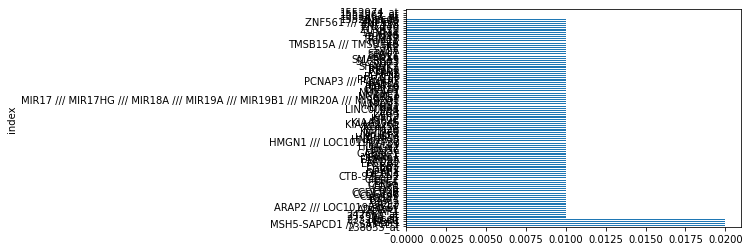

In [19]:
#The Model

from sklearn.ensemble import RandomForestClassifier
start=time.time()


clf_1 = RandomForestClassifier()
clf_1.fit(X_train, y_train)
prediction = clf_1.predict(X_test)
scores = cross_val_score(clf_1, X_data, y_data, cv=5)

end = time.time()

accuracy_all.append(accuracy_score(prediction, y_test))
cvs_all.append(np.mean(scores))

print("Random Forest Accuracy: {0:.2%}".format(accuracy_score(prediction, y_test)))
print("Cross validation score: {0:.2%} (+/- {1:.2%})".format(np.mean(scores), np.std(scores)*2))
print("Execution time: {0:.5} seconds \n".format(end-start))
feat_importances = pd.Series(clf_1.feature_importances_, index=result_2.columns)
feat_importances.nlargest(100).plot(kind='barh')
table=pd.DataFrame(feat_importances.nlargest(250), columns=["Importance"])
print(table)


table_csv= table.to_csv('stringer.csv', index = True)


#Best Features




 

